In [5]:
import nltk
from nltk.corpus import sentiwordnet as swn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_sentiments_data_from_corpus(corpus, skipWordNetPos=[]):
    documents = {}
    all_positives = []
    all_negatives = []
    for fileid in corpus.fileids():
        tokens = corpus.words(fileid)
        score, positives, negatives = get_sentiment_data_from_tokens(tokens, skipWordNetPos)
        documents[fileid] = score
        [all_positives.append(positive) for positive in positives]
        [all_negatives.append(negative) for negative in negatives]
    return documents, set(all_positives), set(all_negatives)

def get_sentiment_data_from_tokens(tokens, skipWordNetPos=[]):
    tagged = nltk.pos_tag(tokens)
    positives = []
    negatives = []
    tokens_score = 0
    for word, treebank in tagged:
        score = get_sentiment_score_from_tagged(word, treebank, skipWordNetPos)
        if score:
            tokens_score += score
            if score > 0:
                positives.append(word.lower())
            else:
                negatives.append(word.lower())
    return tokens_score, set(positives), set(negatives)

def get_sentiment_score_from_tagged(token, treebank, skipWordNetPos=[]):
    wordnet_pos = treebank_to_wordnet_pos(treebank, skipWordNetPos)
    if wordnet_pos: # only print matches
        senti_synsets = list(swn.senti_synsets(token, wordnet_pos))
        if senti_synsets:
            return senti_synsets[0].pos_score() - senti_synsets[0].neg_score()

def treebank_to_wordnet_pos(treebank, skipWordNetPos=[]):
    if "NN" in treebank and "n" not in skipWordNetPos: # singular and plural nouns (NN, NNS)
        return "n"
    elif "JJ" in treebank and "a" not in skipWordNetPos: # adjectives (JJ, JJR, JJS)
        return "a" 
    elif "VB" in treebank and "v" not in skipWordNetPos: # verbs (VB, VBD, VBG, VBN, VBP, VBZ)
        return "v"
    elif "RB" in treebank and "r" not in skipWordNetPos: # adverbs (RB, RBR, RBS)
        return "r"
    # if we don't match any of these we implicitly return None

def sentiment_analyze(bookStr, title):
    # simple lowercase tokenize
    tokens = nltk.word_tokenize(bookStr.lower())
    
    score_tokens = get_sentiment_data_from_tokens(tokens)
    print("Sentiment Score for " + title + ": " + str(score_tokens[0]))
   # print("Positive samples for " + title + ": " + str(score_tokens[1]))
   # print("Negative samples for " + title + ": " + str(score_tokens[2]))
    return score_tokens[0]

In [14]:
# nltk.download()
fullBookStr = ""
scores = []
indexes = [i for i in range(25)]
# read The books plain text into string
for i in range(1, 25):
    with open("data/"+ str(i), "r") as f:
        bookStr = f.read()
    fullBookStr += "\n" + bookStr
    scores.append(sentiment_analyze(bookStr, "Book " + str(i)))
    print()

Sentiment Score for Book 1: 7.25

Sentiment Score for Book 2: 4.625

Sentiment Score for Book 3: 19.153000000000002

Sentiment Score for Book 4: -10.334

Sentiment Score for Book 5: -54.584

Sentiment Score for Book 6: -4.959

Sentiment Score for Book 7: 23.125

Sentiment Score for Book 8: -20.959

Sentiment Score for Book 9: 27.625

Sentiment Score for Book 10: -7.0

Sentiment Score for Book 11: -16.375

Sentiment Score for Book 12: -16.125

Sentiment Score for Book 13: -32.709

Sentiment Score for Book 14: 5.0

Sentiment Score for Book 15: -19.897

Sentiment Score for Book 16: -25.084

Sentiment Score for Book 17: -52.375

Sentiment Score for Book 18: -9.875

Sentiment Score for Book 19: -28.444000000000003

Sentiment Score for Book 20: -14.0

Sentiment Score for Book 21: -46.0

Sentiment Score for Book 22: -41.625

Sentiment Score for Book 23: 10.291

Sentiment Score for Book 24: -14.25



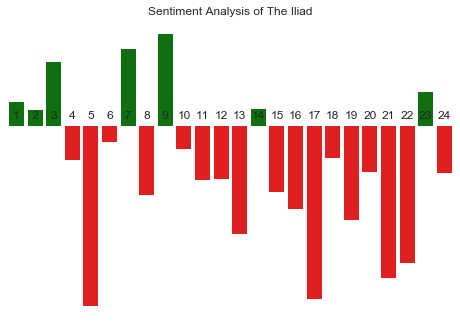

In [21]:
sns.axes_style('white')
sns.set_style('white')

colors = ['green' if _y >=0 else 'red' for _y in y]
ax = sns.barplot(x, y, palette=colors)

for n, (label, _y) in enumerate(zip(x, y)):

    ax.annotate(
        s=label,
        xy=(n, 0),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points',
    )  
# axes formatting
ax.set_yticks([])
ax.set_xticks([])
sns.despine(ax=ax, bottom=True, left=True)
plt.title("Sentiment Analysis of The Iliad")
plt.show()
#sentiment_analyze(fullBookStr, "The Iliad")